Warning message:
"package 'fredr' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"


Call:
lm(formula = var_tot$Var_M1 ~ var_tot$Var_M2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0858 -0.2922  0.0096  0.2782  5.8437 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.07092    0.01672  -4.242 2.31e-05 ***
var_tot$Var_M2  1.65805    0.06698  24.753  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.669 on 2064 degrees of freedom
Multiple R-squared:  0.2289,	Adjusted R-squared:  0.2285 
F-statistic: 612.7 on 1 and 2064 DF,  p-value: < 2.2e-16


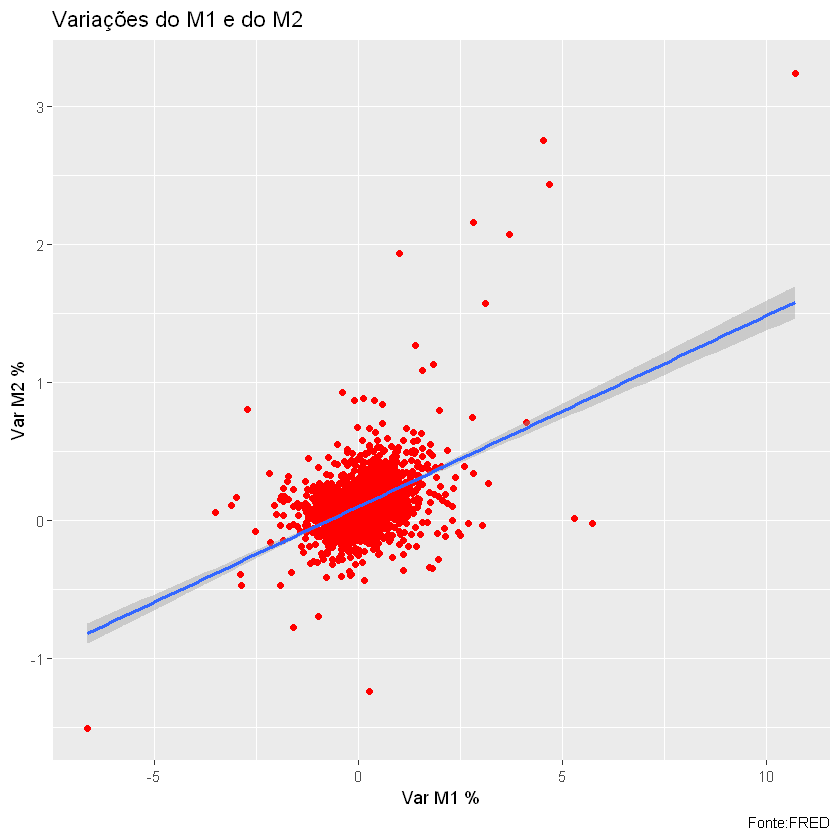

In [4]:
library(fredr)
library(ggplot2)
fredr_set_key("a1e53d11bf4cb319624da39b894a79e6")
m1_stock <- fredr("M1", observation_start = as.Date("1980-11-03"), frequency = "w")
m2_stock <- fredr("M2", frequency = "w")
varm2 <- (diff(m2_stock$value,1)/m2_stock$value[1:length(m2_stock$value)-1])*100
varm1 <- (diff(m1_stock$value, 1)/m1_stock$value[1:length(m1_stock$value)-1])*100
datas <- seq(as.Date("1980-11-10"), Sys.Date()-8, "1 week")
var_tot <- data.frame(Data = datas, Var_M1 = varm1, Var_M2 = varm2)
ggplot(var_tot, aes(x = Var_M1, y = Var_M2))+
  geom_point(colour = "red")+
  geom_smooth(formula = y ~ x, method = "lm")+
  labs(x = "Var M1 %", y = "Var M2 %", title = "Variações do M1 e do M2",
       caption = "Fonte:FRED")
regressao <- lm(var_tot$Var_M1 ~ var_tot$Var_M2)
summary(regressao)